<a href="https://colab.research.google.com/github/rlackdrhkd/test-1/blob/main/%EA%B5%AD%EC%B1%85%EC%97%B0%EA%B5%AC%EA%B8%B0%EA%B4%80_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_%EB%94%A5%EB%9F%AC%EB%8B%9D_%EC%8B%AC%ED%99%94%EA%B3%BC%EC%A0%95_1%EC%9D%BC%EC%B0%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Activation_function***

In [1]:
# 간단한 활성화 함수 예시 만들어 보기 1
def actv_fcn_ex1(x):

    # 10보다 큰 신호는 전달하지 않는다
    if (x >= 10):
        x = 10
    else:
        x = x

    # 0 보다 작은 신호는 전달하지 않는다
    if (x <= 0):
        x = 0
    else:
        x = x

    return(x)

In [2]:
# 간단한 활성화 함수 예시 만들어 보기 2
def actv_fcn_ex2(x):

    # 10보다 큰 신호는 10으로 전달
    if (x >= 10):
        x = 10

    else:
        x = x

    # 10 보다 작은 신호는 0으로 전달
    if (x < 10):
        x = 0
    else:
        x = x

    return(x)

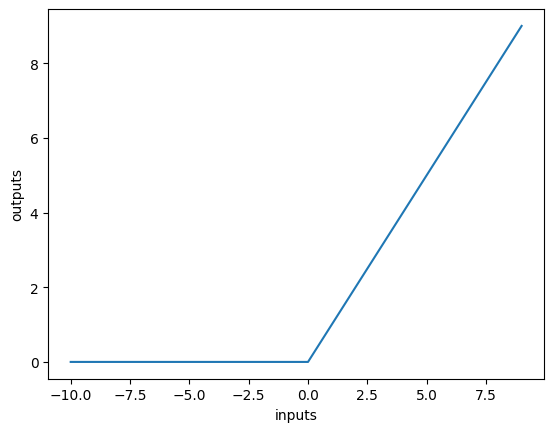

In [5]:
# relu activation function
# rectify: 직류로 바꾸다, 고르게 하다..

import matplotlib.pyplot as plt

# rectified linear function 만들기
def rectified(x):
    return max(0.0, x) # 0보다 큰 수만 전달

# 입력 신호의 예시 -10 ~ 10
inputs = [x for x in range(-10, 10)]

# 입력신호의 예시를 이용한 그래프 그려보기
outputs = [rectified(x) for x in inputs]

# plot inputs vs outputs
plt.plot(inputs, outputs)
plt.xlabel('inputs')
plt.ylabel('outputs')
plt.show()

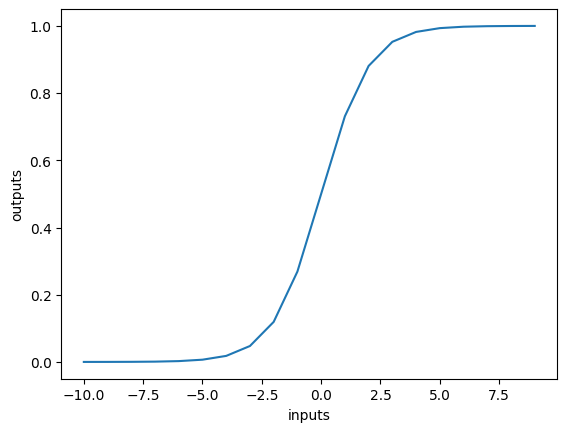

In [6]:
# sigmoid activation function


from math import exp
import matplotlib.pyplot as plt

# sigmoid activation function 만들기
def sigmoid(x):
    return 1.0 / (1.0 + exp(-x)) # 극한의 값은 0과 1 사이의 값으로..

# 입력 신호의 예시 -10 ~ 10
inputs = [x for x in range(-10, 10)]

# 입력신호의 예시를 이용한 그래프 그려보기
outputs = [sigmoid(x) for x in inputs]

# plot inputs vs outputs
plt.plot(inputs, outputs)
plt.xlabel('inputs')
plt.ylabel('outputs')
plt.show()

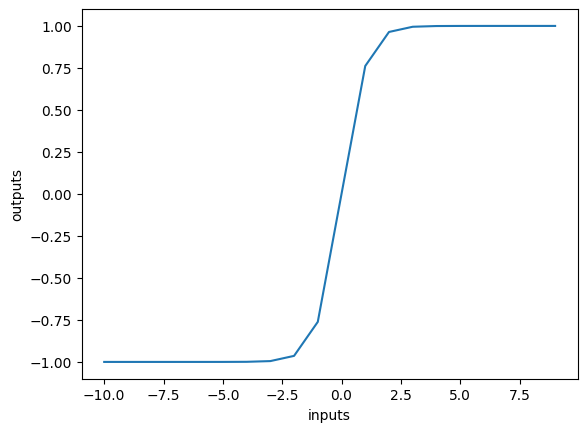

In [7]:
# tanh activation function

from math import exp
import matplotlib.pyplot as plt

# tanh activation function 만들기
def tanh(x):
    return (exp(x) - exp(-x)) / (exp(x) + exp(-x))

# 입력 신호의 예시 -10 ~ 10
inputs = [x for x in range(-10, 10)]

# 입력신호의 예시를 이용한 그래프 그려보기
outputs = [tanh(x) for x in inputs]
# plot inputs vs outputs
plt.plot(inputs, outputs)
plt.xlabel('inputs')
plt.ylabel('outputs')
plt.show()

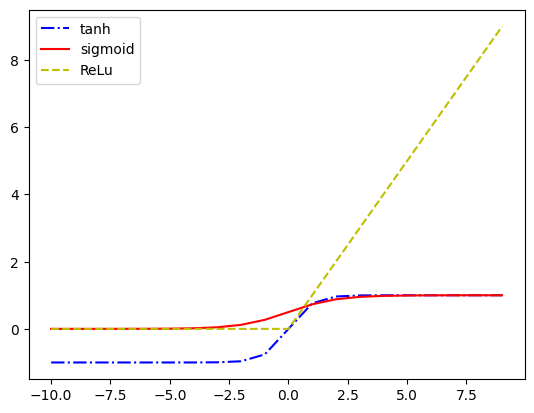

In [8]:
from math import exp
import matplotlib.pyplot as plt

# tanh
def tanh(x):
    return (exp(x) - exp(-x)) / (exp(x) + exp(-x))

# sigmoid
def sigmoid(x):
    return 1.0 / (1.0 + exp(-x))

# ReLu
def rectified(x):
    return max(0.0, x)

# 입력 신호의 예시 -10 ~ 10
inputs = [x for x in range(-10, 10)]

# 입력신호의 예시를 이용한 그래프 그려보기
tanh_outputs = [tanh(x) for x in inputs]
sigmoid_outputs = [sigmoid(x) for x in inputs]
ReLu_outputs = [rectified(x) for x in inputs]

fig, ax = plt.subplots()
plt.plot(inputs, tanh_outputs, '-.b', label='tanh')
plt.plot(inputs, sigmoid_outputs, 'r', label='sigmoid')
plt.plot(inputs, ReLu_outputs, '--y', label='ReLu')
leg = ax.legend()
plt.show()

***SGD***

In [9]:
"""
필요한 함수들을 불러오기:
pandas - 다양한 데이터 계산을 위한 라이브러리
numpy - 복잡한 산술계산,
matplotlib - 그래프 그리기,
sklearn - 모델의 분석을 위한 라이브러리
    1) train_test_split - 모델을 위한 훈련과 검증 데이터 분리 모듈
    2) StandardScaler - 데이터 전처리를 위한 모듈
    3) SGDClassifier - Stochastic Gradient Decent
    [https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html]
"""
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier

In [10]:
# 샘플데이터(fish) 불러오기 및 간단 확인
fish = pd.read_csv('https://bit.ly/fish_csv_data')
print(fish)

    Species  Weight  Length  Diagonal   Height   Width
0     Bream   242.0    25.4      30.0  11.5200  4.0200
1     Bream   290.0    26.3      31.2  12.4800  4.3056
2     Bream   340.0    26.5      31.1  12.3778  4.6961
3     Bream   363.0    29.0      33.5  12.7300  4.4555
4     Bream   430.0    29.0      34.0  12.4440  5.1340
..      ...     ...     ...       ...      ...     ...
154   Smelt    12.2    12.2      13.4   2.0904  1.3936
155   Smelt    13.4    12.4      13.5   2.4300  1.2690
156   Smelt    12.2    13.0      13.8   2.2770  1.2558
157   Smelt    19.7    14.3      15.2   2.8728  2.0672
158   Smelt    19.9    15.0      16.2   2.9322  1.8792

[159 rows x 6 columns]


In [11]:
# Species 열을 제외한 나머지 5개 열은 입력 데이터로, Species 열은 Target 데이터로 설정
fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()
fish_target = fish['Species'].to_numpy()

In [12]:
# 데이터를 훈련세트와 테스트 세트로 분리
train_input, test_input, train_target, test_target = train_test_split(
    fish_input, fish_target, random_state = 42)
# *random_state는 얼마만큼 입력데이터를 섞어서 샘플링을 할지 결정하는 계수

In [13]:
# 데이터의 특성을 표준화 (train과 test 모두 동일하게 작업)
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [14]:
# 손실함수는 로지스틱 회귀(logistic regression)로 확률 추출 방법을 선택 (연속값)
# 이외에도 선형 값인 경우 'hinge' 값을 입력할 수 있음
sc = SGDClassifier(loss='log', random_state = 42)
train_score = []
test_score = []
classes = np.unique(train_target)

In [15]:
# 반복횟수(epoch)를 조절하여 훈련데이터와 테스트 결과를 확인
for _ in range(0,10):
    sc.partial_fit(train_scaled, train_target, classes = classes)
    train_score.append(sc.score(train_scaled, train_target))
    test_score.append(sc.score(test_scaled, test_target))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


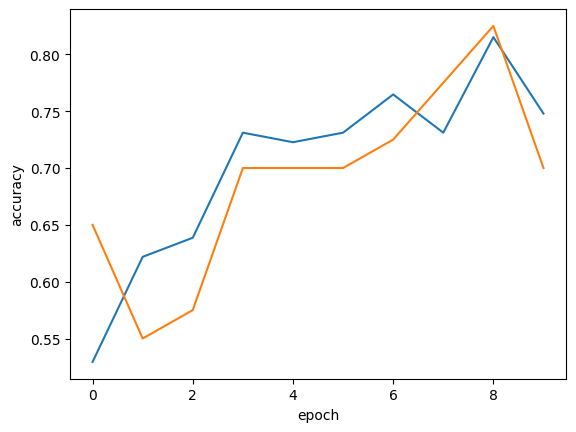

In [17]:
# 시각화 (결과는 1에 가까울 수록 좋음)
# - 파란색은 훈련그래프, 주황색은 테스트그래프
plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [18]:
# 수치결과 비교
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.7478991596638656
0.7


***CNN***

In [19]:
"""
필요한 함수들을 불러오기:
keras - 신경망 계산 가속화,
tensorflow - 벡터행렬 및 미분 계산,
numpy - 복잡한 산술계산,
matplotlib - 그래프 그리기
"""
# 필요한 함수 불러오기
import tensorflow as tf
from tensorflow.keras.models import Sequential # ANNs model
from tensorflow.keras.layers import Dense, Activation # fully-connected layer with activation function
from tensorflow.keras.utils import to_categorical # library for using Encoding
from tensorflow.keras.datasets import mnist # calling dataset
from tensorflow.keras import layers, models
from tensorflow import keras

import time
import numpy as np
import matplotlib.pyplot as plt

In [20]:
# keras에 있는 샘플데이터(mnist) 불러오기
(x_train, y_train), (x_test, y_test) = mnist.load_data() # mnist에 내제되어 있는 데이터셋의 구성대로 불러오기
# 불러온 minst 데이터가 맞게 들어왔는지 확인
print("x_train shape", x_train.shape)
print("y_train shape", y_train.shape)
print("x_test shape", x_test.shape)
print("y_test shape", y_test.shape)

11490434/11490434 [==============================] - 1s 0us/step
x_train shape (60000, 28, 28)
y_train shape (60000,)
x_test shape (10000, 28, 28)
y_test shape (10000,)


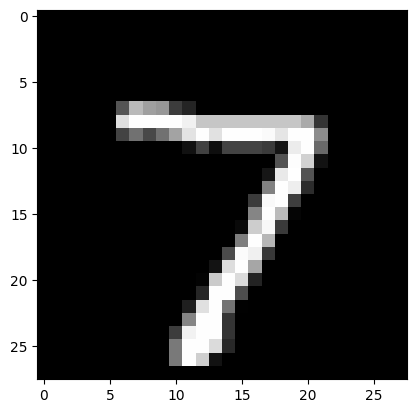

In [21]:
# data 그림으로 확인하기
plt.figure()
plt.imshow(x_test[0], cmap='gray')

In [22]:
X_train = x_train.reshape(60000, 28 ,28, 1)   # 3차원 배열(샘플수, 가로, 세로)의 4차원 화
X_test = x_test.reshape(10000, 28 ,28, 1)
X_train = X_train.astype('float32')  # 데이터의 정규화를 위한 형식변경
X_test = X_test.astype('float32')
X_train /=255   # 256 색 데이터의 정규화(0~1 사이의 값으로 일반화, Normalization)
X_test /=255
print("X Training matrix shape", X_train.shape) # 변환된 데이터 확인
print("X Testing matrix shape", X_test.shape)

X Training matrix shape (60000, 28, 28, 1)
X Testing matrix shape (10000, 28, 28, 1)


In [23]:
Y_train = to_categorical(y_train, 10) # One-hot Encoding으로 입력값 일반화
Y_test = to_categorical(y_test, 10)
print("Y Training matrix shape", Y_train.shape)
print("Y Testing matrix shape", Y_test.shape)

Y Training matrix shape (60000, 10)
Y Testing matrix shape (10000, 10)
